In [145]:
#Instalo e importo paquetes 

!pip install pandas
import pandas as pd 

import numpy as np 
import os

from IPython.display import Image, display

import matplotlib.pyplot as plt
import seaborn as sns


#Seteo el tamaño de las Columnas y Filas que me muestra Jupiter

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 17)


In [151]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('usu_individual_T125.xlsx')


In [152]:

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('Individual_t105.dta')

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION
print(t0105.dtypes)
print(t0125.dtypes)

CODUSU          object
nro_hogar      float64
componente    category
h15           category
ano4           float64
                ...   
adeccfr         object
pj1_1         category
pj2_1         category
pj3_1         category
idimpp          object
Length: 176, dtype: object
CODUSU         object
ANO4            int64
TRIMESTRE       int64
NRO_HOGAR       int64
COMPONENTE      int64
               ...   
P_RDECCF      float64
P_GDECCF      float64
P_PDECCF      float64
P_IDECCF      float64
P_ADECCF      float64
Length: 235, dtype: object


In [166]:

#PRIMERO VOY ESTABLECER LAS FILAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS
#QUE SON LA DE LOS AGLOMERADOS DE LA REGION NOA

categorias = ['Santiago del Estero - La Banda', 'Salta', 'La Rioja', 'Gran Catamarca', 'Jujuy - Palpalá','Gran Tucumán - Tafí Viejo']
Sel_t0105_1 = t0105[t0105['aglomerado'].isin(categorias)].copy()


categorias2 = [18,19,22,23,25,29]
Sel_t0125_1 = t0125[t0125['AGLOMERADO'].isin(categorias2)].copy()

#AHORA VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

Sel_t0105 = Sel_t0105_1[[
'CODUSU', 'nro_hogar', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch14', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp04b_cod', 'ipcf'
]].copy()

Sel_t0125 = Sel_t0125_1[[
'CODUSU', 'NRO_HOGAR', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF'
]].copy()



In [149]:
# Asi se llamara el excel
archivo_nombre = "sel_t105.xlsx"
#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\outputs'

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
Sel_t0105.to_excel(destino, index=False)
#######################################################
# Asi se llamara el excel
archivo_nombre = "sel_t125.xlsx"
#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\outputs'

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
Sel_t0125.to_excel(destino, index=False)

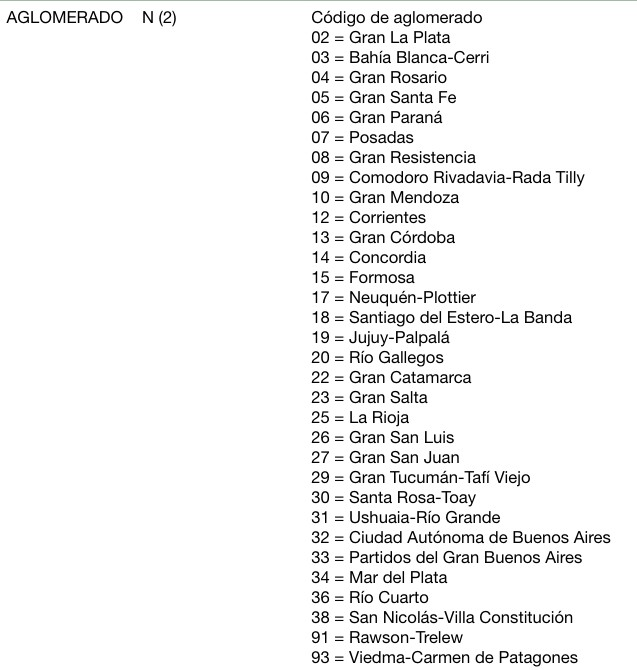

In [13]:
# Aqui empiezo a homogeneizar las bases de datos para poder filtrar y unificarlas.


#AGLOMERADOS: Del listado me voy a quedar solo con la región NOA

display(Image(filename='C:/Users/rodol/Desktop/BDyML/Repositorio/BigDataUBA-Grupo3/TP2-Grupo3/inputs/AGLOMERADO.jpg'))



In [167]:
#EMPIEZO A RECODIFICAR LAS COLUMNAS NECESARIAS PARA QUE SE PUEDAN UNIFICAR, FINALMENTE AMBOS DATAFRAMES

# Diccionario del mapeo de los aglomerados pertenecientes al NOA
aglomerado_map = {
    'Santiago del Estero - La Banda': 18,    'Jujuy - Palpalá': 19,
    'Gran Catamarca': 22,    'Salta': 23,
    'La Rioja': 25,          'Gran Tucumán - Tafí Viejo': 29
                }
errores = []

Sel_t0105['aglomerado'] = Sel_t0105['aglomerado'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'aglomerado']
    if desc in aglomerado_map:
        Sel_t0105.at[i, 'aglomerado'] = aglomerado_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado transformo el tipo de dato
Sel_t0105['aglomerado'] = Sel_t0105['aglomerado'].astype('int64')




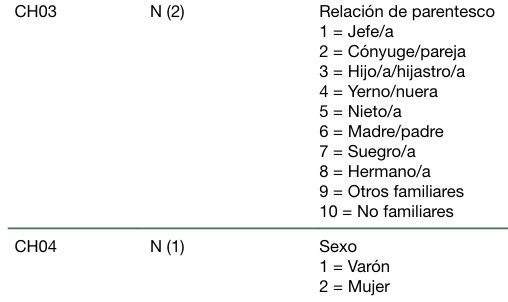

In [12]:
# repito el proceso para las siguientes columnas 

display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\GP_SEXO.jpg'))


In [136]:

#Defino el diccionario de valores que debe buscar y reemplazar
ch03_map = {
    'Jefe/a': 1,     'Jefe': 1,
    'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,
    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
    'Yerno/nuera': 4,        'Yerno/Nuera': 4,
    'Nieto/a': 5,            'Nieto': 5,
    'Madre/padre': 6,         'Madre/Padre': 6,
    'Suegro/a': 7,             'Suegro': 7,
    'Hermano/a': 8,              'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}

errores = []

#Para el 2005
Sel_t0105['ch03'] = Sel_t0105['ch03'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch03']
    if desc in ch03_map:
        Sel_t0105.at[i, 'ch03'] = ch03_map[desc]
    else:
        errores.append((i, desc))


#una vez recodificado transformo el tipo de dato

Sel_t0105['ch03'] = pd.to_numeric(Sel_t0105['ch03'], errors='coerce')

In [168]:
# tomare a la variable sexo con una Dummies, recodificandola en 0 y 1.

Sel_t0105['ch04'] = np.where(Sel_t0105['ch04'] == 'Varón', 1, 0)

Sel_t0125['CH04'] = np.where(Sel_t0125['CH04'] == 2,1,0)

#una vez recodificado transformo el tipo de dato
Sel_t0105['ch04'] = Sel_t0105['ch04'].astype('int64')

pd.set_option('display.max_rows', 30)

Sel_t0125


,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF
31,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,1,1,73,5,1.0,NaN,2,3,0,1,NaN,198750.0
32,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,3,1,38,5,1.0,NaN,4,1,3,0,9700.0,198750.0
33,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,1,34,5,1.0,NaN,6,1,3,0,9700.0,198750.0
34,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,0,19,5,1.0,2.0,3,3,0,7,NaN,198750.0
35,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,0,16,5,1.0,NaN,2,3,0,7,NaN,198750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45364,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,1,1,90,4,1.0,NaN,4,3,0,1,NaN,1250000.0
45365,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,3,1,60,5,1.0,NaN,6,1,3,0,8501.0,1250000.0
45366,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,5,1,22,5,1.0,3.0,5,3,0,3,NaN,1250000.0
45367,TQRMNOPPVHKOKSCDEHIBB00860370,1,22,108,1,0,25,1,4.0,NaN,2,1,3,0,5601.0,537500.0


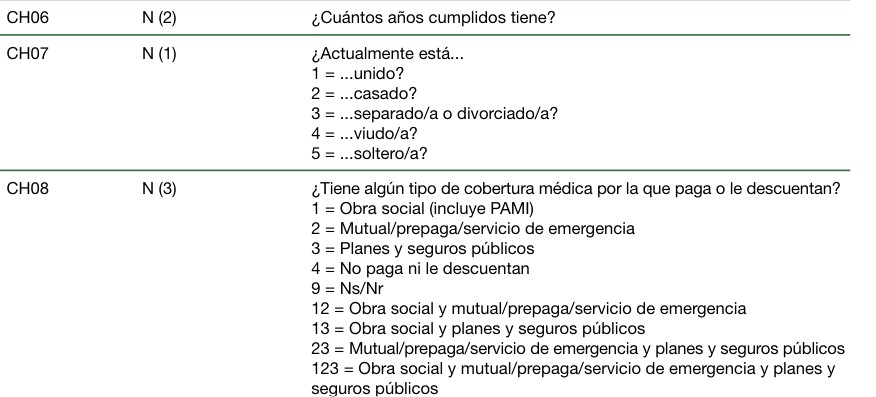

In [23]:
display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\EDAD_ECIVIL_OS.jpg'))

In [170]:
#Excluimos los valores de EDAD-ch06 fuera de rango, que son aquellos de menos de un año y los mayores de 98.. Pueden ser errores de carga

###########################################
#Para el 2005
Sel_t0105['ch06'] = Sel_t0105['ch06'].astype(str)

Sel_t0105 = Sel_t0105.loc[
    (Sel_t0105['ch06'] != 'Menos de 1 año') & 
    (Sel_t0105['ch06'] != '98 y más años')
]

Sel_t0105['ch06'] = pd.to_numeric(Sel_t0105['ch06'], errors='coerce')

###########################################

#Para el 2025
Sel_t0125['CH06'] = Sel_t0125['CH06'].astype(str)

Sel_t0125 = Sel_t0125.loc[
    (Sel_t0125['CH06'] != 'Menos de 1 año') & 
    (Sel_t0125['CH06'] != '98 y más años') &
    (Sel_t0125['CH06'] != 103) &
    (Sel_t0125['CH06'] != -1) 
]

Sel_t0125['CH06'] = pd.to_numeric(Sel_t0125['CH06'], errors='coerce')


In [123]:


ch07_map = {'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }


Sel_t0105['ch07'] = Sel_t0105['ch07'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch07']
    if desc in ch07_map:
        Sel_t0105.at[i, 'ch07'] = ch07_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado transformo el tipo de dato
Sel_t0105['ch07'] = Sel_t0105['ch07'].astype('int64')

In [126]:

ch08_map = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

Sel_t0105['ch08'] = Sel_t0105['ch08'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch08']
    if desc in ch08_map:
        Sel_t0105.at[i, 'ch08'] = ch08_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['ch08'] = pd.to_numeric(Sel_t0105['ch08'], errors='coerce')


In [124]:
#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

Sel_t0105['ch14'] = Sel_t0105['ch14'].str.strip()

Sel_t0105['ch14'] = pd.to_numeric(Sel_t0105['ch14'], errors='coerce')




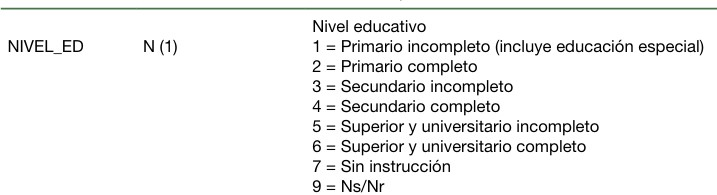

In [16]:
display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\N_EDUC.jpg'))

In [127]:

nivel_ed_map = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

Sel_t0105['nivel_ed'] = Sel_t0105['nivel_ed'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'nivel_ed']
    if desc in nivel_ed_map:
        Sel_t0105.at[i, 'nivel_ed'] = nivel_ed_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['nivel_ed'] = pd.to_numeric(Sel_t0105['nivel_ed'], errors='coerce')



CODUSU          object
nro_hogar      float64
aglomerado       int64
pondera        float64
ch03          category
ch04             int64
ch06            object
ch07             int64
ch08             int64
ch14           float64
nivel_ed         int64
estado        category
cat_ocup      category
cat_inac      category
pp04b_cod       object
ipcf           float64
dtype: object


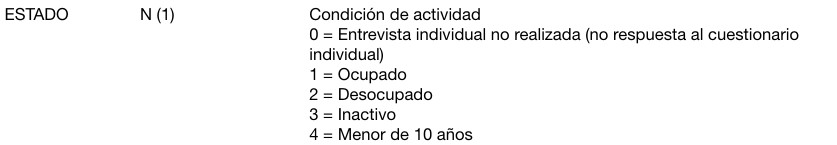

In [20]:
display(Image(filename=r"C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\EST_LABORAL.jpg"))

In [129]:

estado_map = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

Sel_t0105['estado'] = Sel_t0105['estado'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'estado']
    if desc in estado_map:
        Sel_t0105.at[i, 'estado'] = estado_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['estado'] = pd.to_numeric(Sel_t0105['estado'], errors='coerce')


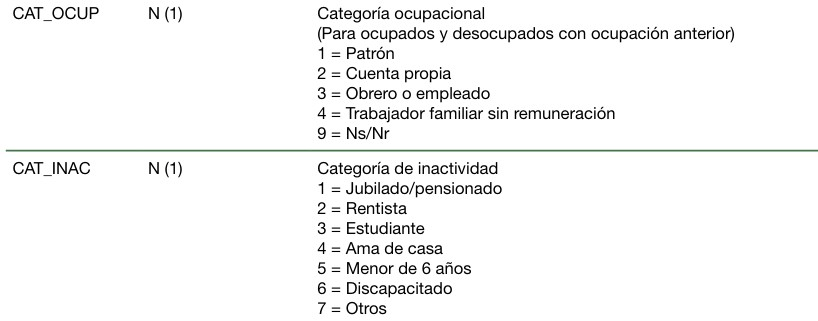

In [23]:
display(Image(filename=r"C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\OCUP_DESOCUP.jpg"))

In [176]:
cat_ocup_map = {'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }

errores = []

Sel_t0105['cat_ocup'] = Sel_t0105['cat_ocup'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_ocup']
    if desc in cat_ocup_map:
        Sel_t0105.at[i, 'cat_ocup'] = cat_ocup_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['cat_ocup'] = pd.to_numeric(Sel_t0105['cat_ocup'], errors='coerce')

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo

Sel_t0105['cat_ocup'] = Sel_t0105['cat_ocup'].replace(0, np.nan)

Sel_t0125['CAT_OCUP'] = Sel_t0125['CAT_OCUP'].replace(0, np.nan)



In [177]:
cat_inac_map = {'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
                 }

Sel_t0105['cat_inac'] = Sel_t0105['cat_inac'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_inac']
    if desc in cat_inac_map:
        Sel_t0105.at[i, 'cat_inac'] = cat_inac_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['cat_inac'] = pd.to_numeric(Sel_t0105['cat_inac'], errors='coerce')

Sel_t0125['CAT_INAC'] = pd.to_numeric(Sel_t0125['CAT_INAC'], errors='coerce')



In [142]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre

Sel_t0105 = Sel_t0105.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'aglomerado': 'AGLOMERADO',
'pondera': 'PONDERA',
'ch03': 'CH03',
'ch04': 'CH04',
'ch06': 'CH06',
'ch07': 'CH07',
'ch08': 'CH08',
'ch14': 'CH14',
'nivel_ed': 'NIVEL_ED',
'estado': 'ESTADO',
'cat_ocup': 'CAT_OCUP',
'cat_inac': 'CAT_INAC',
'pp04b_cod': 'PP04B_COD',
'ipcf': 'IPCF'
})

print(Sel_t0105.dtypes)



CODUSU         object
NRO_HOGAR     float64
AGLOMERADO      int64
PONDERA       float64
CH03            int64
CH04            int64
CH06          float64
CH07            int64
CH08            int64
CH14          float64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP      float64
CAT_INAC      float64
PP04B_COD      object
IPCF          float64
dtype: object


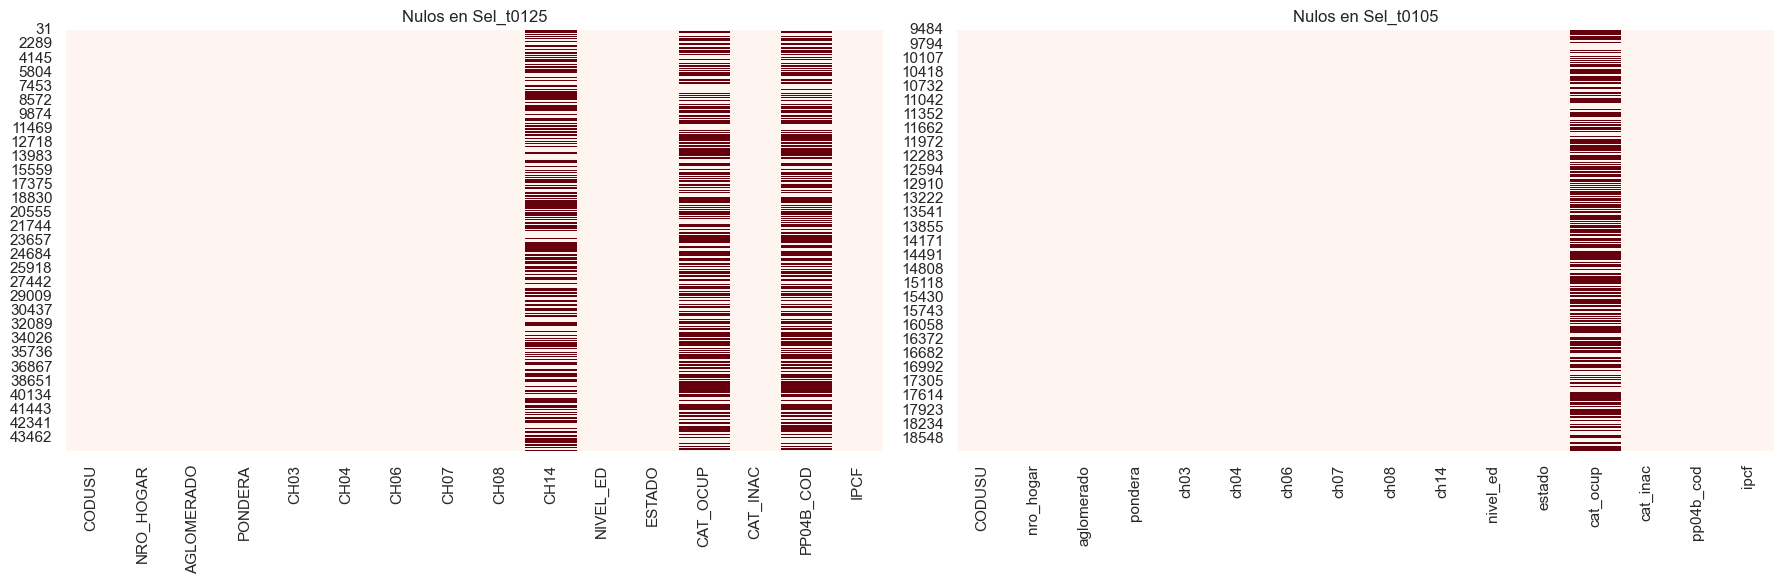

Nulos en Sel_t0125:
CODUSU           0
NRO_HOGAR        0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH06             0
CH07             0
CH08             0
CH14          4836
NIVEL_ED         0
ESTADO           0
CAT_OCUP      5219
CAT_INAC         0
PP04B_COD     5389
IPCF             0
dtype: int64

Nulos en Sel_t0105:
CODUSU           0
nro_hogar        0
aglomerado       0
pondera          0
ch03             0
ch04             0
ch06             0
ch07             0
ch08             0
ch14             0
nivel_ed         0
estado           0
cat_ocup      5420
cat_inac         0
pp04b_cod        0
ipcf             0
dtype: int64


In [175]:
#Ahora paso a analizar los nulos de las columnas de ambos DataFrames

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Aqui elijo el estilo
sns.set(style="whitegrid")


# Mapas de calor para las Selecciones

# Para 2025
sns.heatmap(Sel_t0125.isnull(), cbar=False, ax=axes[0], cmap="Reds")
axes[0].set_title("Nulos en Sel_t0125")

# Para 2005
sns.heatmap(Sel_t0105.isnull(), cbar=False, ax=axes[1], cmap="Reds")
axes[1].set_title("Nulos en Sel_t0105")


#Junto los 2 Mapas para verlos 
plt.tight_layout()
plt.show()

#Creo una tabla con un conteo

print("Nulos en Sel_t0125:")
print(Sel_t0125.isnull().sum())

print("\nNulos en Sel_t0105:")
print(Sel_t0105.isnull().sum())

In [143]:
#Ahora uno a las 2 bases de datos individuales

Sel_indiv = pd.concat([Sel_t0125, Sel_t0105], axis=0, ignore_index=True)
#Sel_indiv= Sel_t0125.append(Sel_t0105)

Sel_indiv


,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF
0,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,1,2,73.0,5,1.0,NaN,2,3,0.0,1.0,NaN,198750.0
1,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,3,2,38.0,5,1.0,NaN,4,1,3.0,0.0,9700.0,198750.0
2,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,2,34.0,5,1.0,NaN,6,1,3.0,0.0,9700.0,198750.0
3,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,19.0,5,1.0,2.0,3,3,0.0,7.0,NaN,198750.0
4,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,16.0,5,1.0,NaN,2,3,0.0,7.0,NaN,198750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,287879,1.0,29,266.0,3,0,10.0,5,2.0,4.0,1,3,0.0,3.0,,130.0
18920,288077,1.0,29,555.0,1,0,31.0,2,1.0,NaN,6,1,3.0,0.0,5306,562.5
18921,288077,1.0,29,555.0,2,0,29.0,2,1.0,NaN,6,3,0.0,4.0,,562.5
18922,288077,1.0,29,555.0,3,0,4.0,5,1.0,NaN,7,4,0.0,5.0,,562.5
